In [1]:
import tonic
import tonic.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
import tonic
from tonic.transforms import ToFrame
from tonic import DiskCachedDataset
from tonic.collation import PadTensors
from torch.utils.data import Subset, Dataset, DataLoader
%matplotlib inline

In [2]:

trainset = tonic.datasets.SHD(save_to="./data", train=True)
testset = tonic.datasets.SHD(save_to="./data", train=False)

print(f"Train size: {len(trainset)} samples")
print(f"Test size: {len(testset)} samples")

  0%|          | 0/130863613 [00:00<?, ?it/s]

Extracting ./data/SHD/shd_train.h5.zip to ./data/SHD


  0%|          | 0/38141465 [00:00<?, ?it/s]

Extracting ./data/SHD/shd_test.h5.zip to ./data/SHD
Train size: 8156 samples
Test size: 2264 samples


In [3]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [4]:

class TransformedDataset(Dataset):
    def __init__(self, dataset, transform):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        events, label = self.dataset[idx]
        return self.transform(events), label
label_range = set(range(0,10))
filtered_indices = [
    i for i in range(len(trainset)) if trainset[i][1] in label_range
]
trainset = Subset(trainset, filtered_indices)
transforms = transforms.Compose([
    tonic.transforms.Downsample(spatial_factor=0.1),
    
    
])
transformdataset=TransformedDataset(trainset, transforms)
transformdataset[0][0]
trainset[0][0]

array([(     0, 654, 1), (   416, 166, 1), (  2040,  31, 1), ...,
       (737793, 273, 1), (738281, 480, 1), (739257,  21, 1)],
      dtype=[('t', '<i8'), ('x', '<i8'), ('p', '<i8')])

In [5]:
all_p = []
for i in range(len(transformdataset)):
    events_down = transformdataset[i][0]
    if 'p' in events_down.dtype.names:
        all_p.append(events_down['p'])
if all_p:
    all_p = np.concatenate(all_p)
    print("Alle Polarity unique values im Datensatz:", np.unique(all_p))
else:
    print("Kein 'p'-Feld in den Events vorhanden.")

Alle Polarity unique values im Datensatz: [1]


Original trainset size: 8156


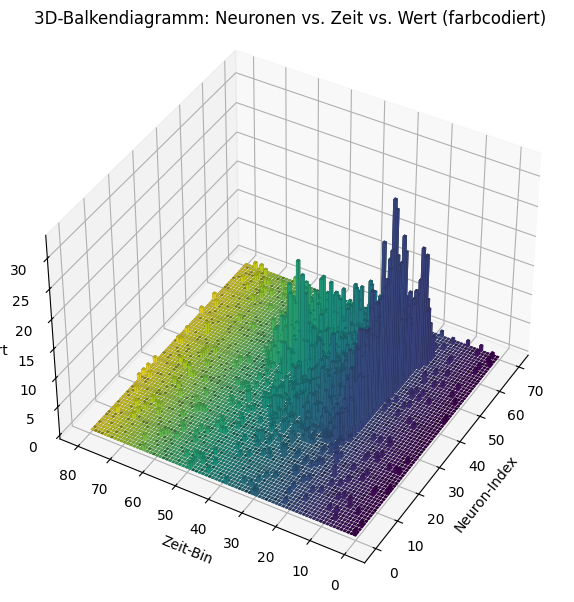

Output()

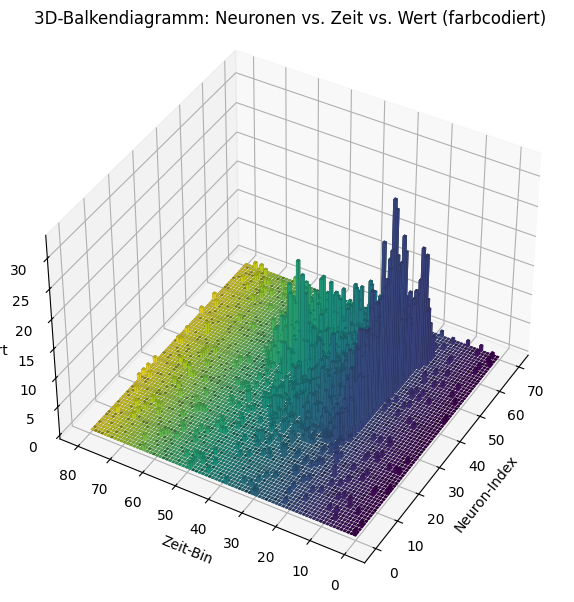

In [6]:
import tonic
import tonic.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
import tonic
from tonic.transforms import ToFrame
from tonic import DiskCachedDataset
from tonic.collation import PadTensors
from torch.utils.data import Subset, Dataset, DataLoader

class TransformedDataset(Dataset):
    def __init__(self, dataset, transform):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        events, label = self.dataset[idx]
        return self.transform(events), label
import numpy as np

class Downsample1D:
    def __init__(self, spatial_factor=0.1):
        self.spatial_factor = spatial_factor

    def __call__(self, events):
        # events ist ein structured array -> unbedingt copy() behalten
        events = events.copy()
        # nur das Feld 'x' skalieren
        events['x'] = (events['x'] * self.spatial_factor).astype(events['x'].dtype)
        return events  # GANZES structured array zurückgeben!


class SqrtTransform:
    def __init__(self, eps=0):
        self.eps = eps  # um sqrt(0) Probleme zu vermeiden
    def __call__(self, frames):
        frames = frames.astype(np.float32)
        return np.sqrt(frames + self.eps)
    
label_range = set(range(0,10))



trainset = tonic.datasets.SHD(save_to="./data", train=True)
print("Original trainset size:", len(trainset))

filtered_indices = [
    i for i in range(len(trainset)) if trainset[i][1] in label_range
]
trainset = Subset(trainset, filtered_indices)
trans = tonic.transforms.Compose([
    Downsample1D(spatial_factor=0.1),   
    tonic.transforms.ToFrame(sensor_size=(70,1,1), n_time_bins=80),
    
])
events,label = trainset[0]
frames = trans(events)
vec = frames[:, 0, :]

# vec: shape (n_time_bins, n_neurons)
n_time_bins, n_neurons = vec.shape

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

_x = np.arange(n_neurons)
_y = np.arange(n_time_bins)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.flatten(), _yy.flatten()
z = np.zeros_like(x)
dz = vec.flatten()
dx = dy = 0.8

# Farben für die Zeit-Bins
colors = plt.cm.viridis(np.linspace(0, 1, n_time_bins))
bar_colors = np.repeat(colors, n_neurons, axis=0)

ax.bar3d(x, y, z, dx, dy, dz, color=bar_colors, shade=True)
ax.set_xlabel('Neuron-Index')
ax.set_ylabel('Zeit-Bin')
ax.set_zlabel('Wert')
ax.set_title('3D-Balkendiagramm: Neuronen vs. Zeit vs. Wert (farbcodiert)')
plt.tight_layout()
ax.view_init(elev=40, azim=210)  # elev=Höhe, azim=Azimutwinkel (Drehung um die y-Achse)
plt.show()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

def plot_3d(elev=40, azim=210):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    _x = np.arange(n_neurons)
    _y = np.arange(n_time_bins)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.flatten(), _yy.flatten()
    z = np.zeros_like(x)
    dz = vec.flatten()
    dx = dy = 0.8
    colors = plt.cm.viridis(np.linspace(0, 1, n_time_bins))
    bar_colors = np.repeat(colors, n_neurons, axis=0)
    ax.bar3d(x, y, z, dx, dy, dz, color=bar_colors, shade=True)
    ax.set_xlabel('Neuron-Index')
    ax.set_ylabel('Zeit-Bin')
    ax.set_zlabel('Wert')
    ax.set_title('3D-Balkendiagramm: Neuronen vs. Zeit vs. Wert (farbcodiert)')
    plt.tight_layout()
    ax.view_init(elev=elev, azim=azim)
    plt.show()

# Interaktive Slider
elev_slider = widgets.IntSlider(value=40, min=0, max=90, step=1, description='elev')
azim_slider = widgets.IntSlider(value=210, min=0, max=360, step=1, description='azim')

ui = widgets.HBox([elev_slider, azim_slider])
out = widgets.Output()

def update_plot(change):
    with out:
        clear_output(wait=True)
        plot_3d(elev_slider.value, azim_slider.value)

elev_slider.observe(update_plot, names='value')
azim_slider.observe(update_plot, names='value')

display(ui, out)
plot_3d(elev_slider.value, azim_slider.value)

In [7]:
from sklearn.manifold import Isomap

# Beispiel: 3D-Reduktion für Visualisierung
isomap = Isomap(n_neighbors=5, n_components=3)
embedding = isomap.fit_transform(vec)

print(embedding.shape)  # (n_time_bins, 3)


(80, 3)


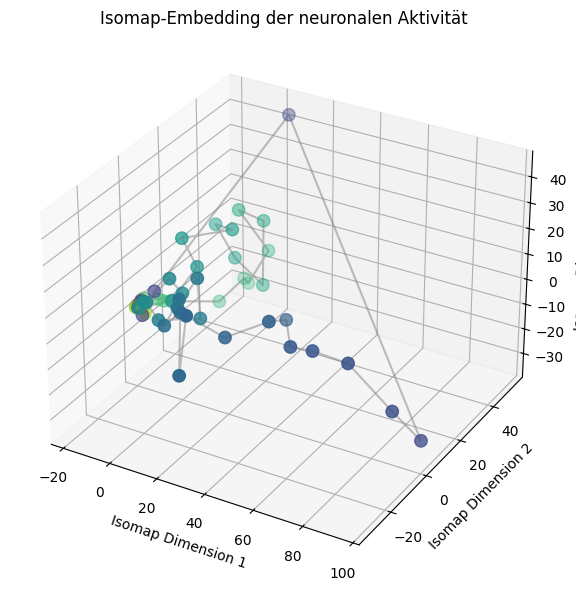

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # notwendig für 3D-Plots
import numpy as np

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Punkte
ax.scatter(
    embedding[:, 0], 
    embedding[:, 1], 
    embedding[:, 2],
    c=np.arange(len(embedding)),      # Farbe = Zeitindex
    cmap='viridis', 
    s=80
)

# Optional: Linienverbindung zwischen aufeinanderfolgenden Zeitpunkten
ax.plot(
    embedding[:, 0], 
    embedding[:, 1], 
    embedding[:, 2],
    color='gray', 
    alpha=0.5
)

ax.set_title("Isomap-Embedding der neuronalen Aktivität")
ax.set_xlabel("Isomap Dimension 1")
ax.set_ylabel("Isomap Dimension 2")
ax.set_zlabel("Isomap Dimension 3")

plt.tight_layout()
plt.show()


In [9]:
embeddings = []
for i in range(20):
    events, label = trainset[i]
    frames = trans(events)
    vec = frames[:, 0, :]
    emb = isomap.fit_transform(vec)
    embeddings.append((emb, label))


/home/karl-/git/xai-for-snn-manifold-learning-and-saliency-maps/venv/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/karl-/git/xai-for-snn-manifold-learning-and-saliency-maps/venv/lib/python3.12/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


/home/karl-/git/xai-for-snn-manifold-learning-and-saliency-maps/venv/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/karl-/git/xai-for-snn-manifold-learning-and-saliency-maps/venv/lib/python3.12/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/karl-/git/xai-for-snn-manifold-learning-and-saliency-maps/venv/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/karl-/git/xai-for-snn-mani

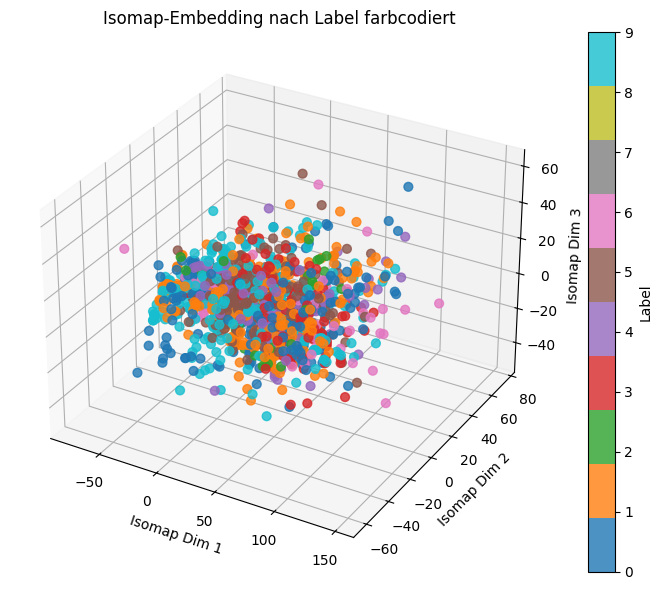

In [10]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import numpy as np

# Einstellungen
n_samples = 30         # wie viele Beispiele du plotten willst
n_neighbors = 5
n_components = 3

isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)

embeddings = []
labels = []

# mehrere Beispiele aus dem Datensatz durchgehen
for i in range(n_samples):
    events, label = trainset[i]
    frames = trans(events)
    vec = frames[:, 0, :]            # (time_bins, neurons)
    emb = isomap.fit_transform(vec)  # (time_bins, 3)
    
    embeddings.append(emb)
    labels.append(label)

# zu einer großen Matrix zusammenfügen
all_emb = np.concatenate(embeddings, axis=0)
all_labels = np.repeat(labels, [emb.shape[0] for emb in embeddings])

# 3D-Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    all_emb[:, 0], 
    all_emb[:, 1], 
    all_emb[:, 2], 
    c=all_labels, 
    cmap='tab10',      # 10 Farben für 10 Ziffern
    s=40, 
    alpha=0.8
)

ax.set_title("Isomap-Embedding nach Label farbcodiert")
ax.set_xlabel("Isomap Dim 1")
ax.set_ylabel("Isomap Dim 2")
ax.set_zlabel("Isomap Dim 3")

# Farbskala (Labels)
cb = plt.colorbar(sc, ax=ax)
cb.set_label("Label")

plt.tight_layout()
plt.show()


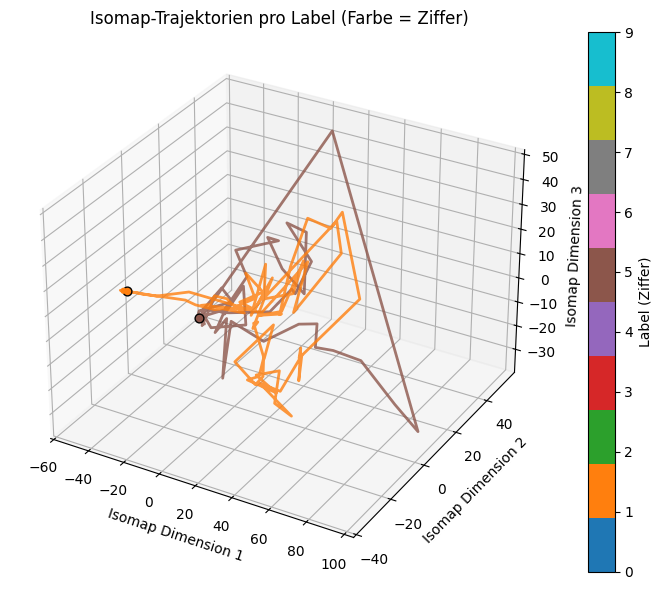

In [11]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import numpy as np

# Einstellungen
n_samples = 2         # Anzahl der Beispiele
n_neighbors = 5
n_components = 3

isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Farbskala für Labels (10 Klassen)
cmap = plt.cm.tab10  # 10 gut unterscheidbare Farben für 0–9

for i in range(n_samples):
    events, label = trainset[i]
    frames = trans(events)
    vec = frames[:, 0, :]          # (time_bins, neurons)
    emb = isomap.fit_transform(vec)  # (time_bins, 3)
    
    color = cmap(label / 10.0)      # eine Farbe pro Label
    
    # Zeitlicher Verlauf (Linie)
    ax.plot(
        emb[:, 0], emb[:, 1], emb[:, 2],
        color=color,
        alpha=0.8,
        linewidth=2
    )
    
    # Startpunkt (größerer Punkt)
    ax.scatter(
        emb[0, 0], emb[0, 1], emb[0, 2],
        color=color, s=40, edgecolor="black", marker="o"
    )
    
    # Endpunkt (kleiner Punkt)
    ax.scatter(
        emb[-1, 0], emb[-1, 1], emb[-1, 2],
        color=color, s=20, edgecolor="none", marker="o"
    )

# Achsenbeschriftung
ax.set_title("Isomap-Trajektorien pro Label (Farbe = Ziffer)")
ax.set_xlabel("Isomap Dimension 1")
ax.set_ylabel("Isomap Dimension 2")
ax.set_zlabel("Isomap Dimension 3")

# Farbskala (Labels)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=9))
cb = plt.colorbar(sm, ax=ax)
cb.set_label("Label (Ziffer)")

plt.tight_layout()
plt.show()


In [12]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider
import ipywidgets as widgets

# --- Interaktive Visualisierung ---
def plot_isomap(target_label=5, n_samples=2, n_neighbors=5, n_components=3,
                elev=20, azim=45):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")

    isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
    cmap = plt.cm.inferno

    count = 0
    for i in range(len(trainset)):
        events, label = trainset[i]
        if label != target_label:
            continue
        count += 1
        if count > n_samples:
            break

        frames = trans(events)
        vec = frames[:, 0, :]
        emb = isomap.fit_transform(vec)

        # Farbverlauf entlang der Zeit
        t = np.linspace(0, 1, emb.shape[0])
        colors = cmap(t)

        # Linie mit Farbverlauf
        for j in range(emb.shape[0] - 1):
            ax.plot(
                emb[j:j+2, 0],
                emb[j:j+2, 1],
                emb[j:j+2, 2],
                color=colors[j],
                linewidth=2,
                alpha=0.8
            )

        # Start-/Endpunkte
        ax.scatter(emb[0, 0], emb[0, 1], emb[0, 2],
                   color="red", s=40, edgecolor="black", label="Start" if i == 0 else "")
        ax.scatter(emb[-1, 0], emb[-1, 1], emb[-1, 2],
                   color="yellow", s=25, edgecolor="none", label="Ende" if i == 0 else "")

    ax.set_title(f"Isomap-Trajektorien – Label {target_label} (rot→gelb = Zeit)")
    ax.set_xlabel("Isomap Dimension 1")
    ax.set_ylabel("Isomap Dimension 2")
    ax.set_zlabel("Isomap Dimension 3")
    ax.legend()

    # Kamera-Perspektive setzen
    ax.view_init(elev=elev, azim=azim)

    plt.tight_layout()
    plt.show()


# --- Interaktive Steuerung mit allen Slidern ---
interact(
    plot_isomap,
    target_label=IntSlider(min=0, max=9, step=1, value=5, description="Label"),
    n_samples=IntSlider(min=1, max=50, step=1, value=2, description="Samples"),
    n_neighbors=IntSlider(min=2, max=20, step=1, value=5, description="Nachbarn"),
    n_components=IntSlider(min=2, max=3, step=1, value=3, description="Komponenten"),
    elev=IntSlider(min=0, max=90, step=5, value=20, description="Elevation"),
    azim=IntSlider(min=0, max=360, step=10, value=45, description="Azimut"),
)


interactive(children=(IntSlider(value=5, description='Label', max=9), IntSlider(value=2, description='Samples'…

<function __main__.plot_isomap(target_label=5, n_samples=2, n_neighbors=5, n_components=3, elev=20, azim=45)>

interactive(children=(IntSlider(value=5, description='Label', max=9), IntSlider(value=30, description='Samples…

<function __main__.plot_tsne(target_label=5, n_samples=2, perplexity=30, learning_rate=200, n_components=3, elev=20, azim=45)>

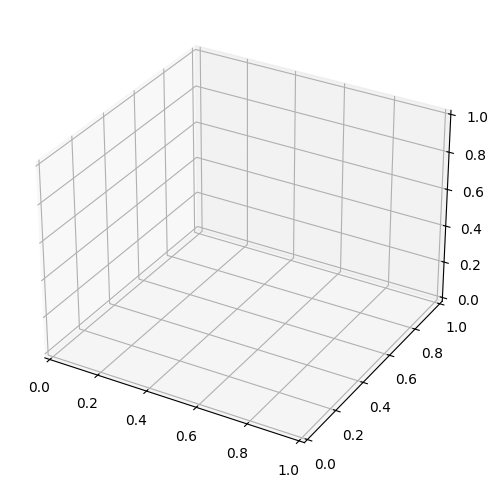

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider, FloatSlider
import ipywidgets as widgets

# --- Interaktive Visualisierung ---
def plot_tsne(target_label=5, n_samples=2, perplexity=30, learning_rate=200,
              n_components=3, elev=20, azim=45):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")

    cmap = plt.cm.inferno

    count = 0
    for i in range(len(trainset)):
        events, label = trainset[i]
        if label != target_label:
            continue
        count += 1
        if count > n_samples:
            break

        frames = trans(events)
        vec = frames[:, 0, :]  # shape: (time_bins, neurons)

        # t-SNE Einbettung
        tsne = TSNE(
            n_components=n_components,
            perplexity=perplexity,
            learning_rate=learning_rate,
            init="pca",
            random_state=42,
            n_iter=1000,
            verbose=0
        )
        emb = tsne.fit_transform(vec)

        # Farbverlauf entlang der Zeit
        t = np.linspace(0, 1, emb.shape[0])
        colors = cmap(t)

        # Linie mit Farbverlauf
        for j in range(emb.shape[0] - 1):
            ax.plot(
                emb[j:j+2, 0],
                emb[j:j+2, 1],
                emb[j:j+2, 2],
                color=colors[j],
                linewidth=2,
                alpha=0.8
            )

        # Start-/Endpunkte
        ax.scatter(emb[0, 0], emb[0, 1], emb[0, 2],
                   color="red", s=40, edgecolor="black", label="Start" if i == 0 else "")
        ax.scatter(emb[-1, 0], emb[-1, 1], emb[-1, 2],
                   color="yellow", s=25, edgecolor="none", label="Ende" if i == 0 else "")

    ax.set_title(f"t-SNE-Trajektorien – Label {target_label} (rot→gelb = Zeit)")
    ax.set_xlabel("t-SNE Dimension 1")
    ax.set_ylabel("t-SNE Dimension 2")
    ax.set_zlabel("t-SNE Dimension 3")
    ax.legend()

    # Kamera-Perspektive setzen
    ax.view_init(elev=elev, azim=azim)

    plt.tight_layout()
    plt.show()


# --- Interaktive Steuerung mit Slidern ---
interact(
    plot_tsne,
    target_label=IntSlider(min=0, max=9, step=1, value=5, description="Label"),
    n_samples=IntSlider(min=1, max=30, step=1, value=42, description="Samples"),
    perplexity=FloatSlider(min=5, max=50, step=1, value=4, description="Perplexity"),
    learning_rate=FloatSlider(min=10, max=1000, step=10, value=200, description="Lernrate"),
    n_components=IntSlider(min=2, max=3, step=1, value=3, description="Komponenten"),
    elev=IntSlider(min=0, max=90, step=5, value=20, description="Elevation"),
    azim=IntSlider(min=0, max=360, step=10, value=45, description="Azimut"),
)


In [14]:
import umap
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider, FloatSlider

# --- Interaktive Visualisierung mit UMAP ---
def plot_umap(target_label=5, n_samples=2, n_neighbors=15, n_components=3, min_dist=0.1,
              elev=20, azim=45):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")

    cmap = plt.cm.inferno
    count = 0

    for i in range(len(trainset)):
        events, label = trainset[i]
        count += 1
        if count > n_samples:
            break

        frames = trans(events)
        vec = frames[:, 0, :]  # (time_bins, neurons)

        # UMAP Einbettung
        reducer = umap.UMAP(
            n_neighbors=n_neighbors,
            n_components=n_components,
            min_dist=min_dist,
            metric='euclidean',
            random_state=42
        )
        emb = reducer.fit_transform(vec)

        # Farbverlauf entlang der Zeit
        t = np.linspace(0, 1, emb.shape[0])
        colors = cmap(t)

        # Linie mit Farbverlauf
        for j in range(emb.shape[0] - 1):
            ax.plot(
                emb[j:j+2, 0],
                emb[j:j+2, 1],
                emb[j:j+2, 2],
                color=colors[j],
                linewidth=2,
                alpha=0.8
            )

        # Start-/Endpunkte
        ax.scatter(emb[0, 0], emb[0, 1], emb[0, 2],
                   color="red", s=40, edgecolor="black", label="Start" if i == 0 else "")
        ax.scatter(emb[-1, 0], emb[-1, 1], emb[-1, 2],
                   color="yellow", s=25, edgecolor="none", label="Ende" if i == 0 else "")

    ax.set_title(f"UMAP-Trajektorien – Label {target_label} (rot→gelb = Zeit)")
    ax.set_xlabel("UMAP Dimension 1")
    ax.set_ylabel("UMAP Dimension 2")
    ax.set_zlabel("UMAP Dimension 3")
    ax.legend()

    # Kamera-Perspektive
    ax.view_init(elev=elev, azim=azim)

    plt.tight_layout()
    plt.show()


# --- Interaktive Steuerung ---
interact(
    plot_umap,
    target_label=IntSlider(min=0, max=9, step=1, value=5, description="Label"),
    n_samples=IntSlider(min=1, max=1000, step=1, value=2, description="Samples"),
    n_neighbors=IntSlider(min=2, max=50, step=1, value=15, description="Neighbors"),
    n_components=IntSlider(min=2, max=3, step=1, value=3, description="Components"),
    min_dist=FloatSlider(min=0.0, max=0.9, step=0.05, value=0.1, description="MinDist"),
    elev=IntSlider(min=0, max=90, step=5, value=20, description="Elevation"),
    azim=IntSlider(min=0, max=360, step=10, value=45, description="Azimut"),
)


interactive(children=(IntSlider(value=5, description='Label', max=9), IntSlider(value=2, description='Samples'…

<function __main__.plot_umap(target_label=5, n_samples=2, n_neighbors=15, n_components=3, min_dist=0.1, elev=20, azim=45)>